# Image compression

In [1]:
# Modules
import matplotlib.pyplot as plt
from matplotlib.image import imread
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import numpy as np
%matplotlib inline
from warnings import filterwarnings
filterwarnings('ignore')

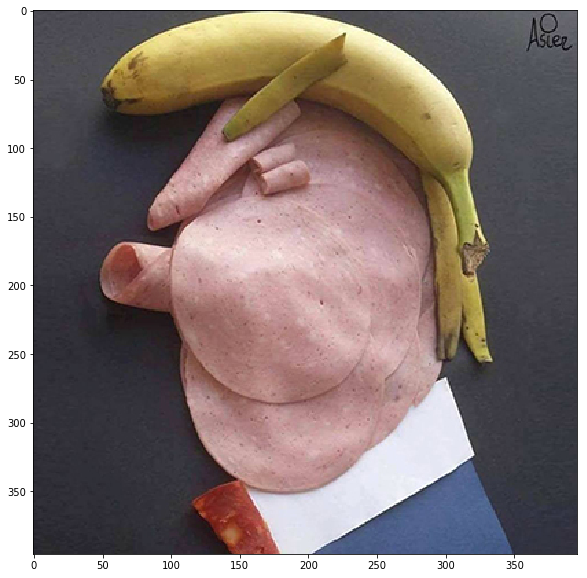

In [2]:
# Read the image
plt.figure(figsize=(10,10))
img = imread('./salami.jpg')
plt.rcParams["axes.grid"] = False
plt.imshow(img)

In [3]:
img_size = img.shape
print("Shape of the image is ",img_size)

Shape of the image is  (396, 396, 3)


In [4]:
# Reshape it to be 2-dimension
X = img.reshape(img_size[0] * img_size[1], img_size[2])

In [30]:
# Run the Kmeans algorithm
km = KMeans(n_clusters=40)
km.fit(X)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=40, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [31]:
# Labels corresponding to clusters for each pixel
km.labels_.shape

(156816,)

In [32]:
# Use the centroids to compress the image
X_compressed = km.cluster_centers_[km.labels_]
X_compressed = np.clip(X_compressed.astype('uint8'), 0, 255)

In [33]:
# Reshape X_recovered to have the same dimension as the original image 
X_compressed = X_compressed.reshape(img_size[0], img_size[1], img_size[2])

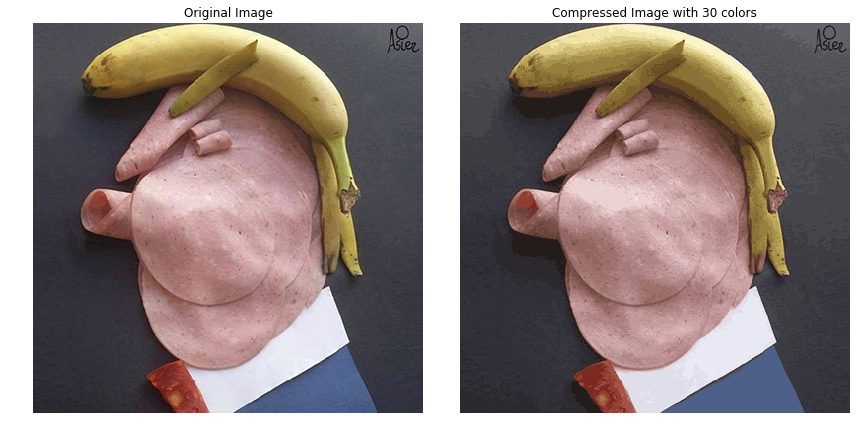

In [34]:
# Plot the original and the compressed image next to each other
fig, ax = plt.subplots(1, 2, figsize = (12, 8))
ax[0].imshow(img)
ax[0].set_title('Original Image')
ax[1].imshow(X_compressed)
ax[1].set_title('Compressed Image with 30 colors')
for ax in fig.axes:
    ax.axis('off')
plt.tight_layout();

# Elbow method

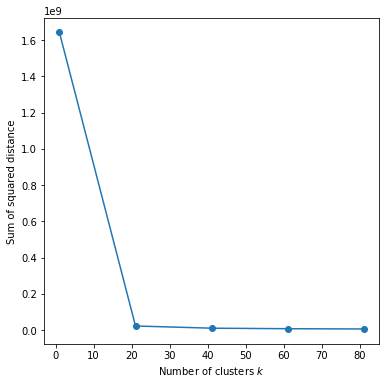

In [35]:
# Run the Kmeans algorithm and get the index of data points clusters
sse = []
list_k = list(range(1, 100,20))

for k in list_k:
    km = KMeans(n_clusters=k)
    km.fit(X)
    sse.append(km.inertia_)

# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_k, sse, '-o')
plt.xlabel(r'Number of clusters $k$')
plt.ylabel('Sum of squared distance');

In [20]:
sse

[1641587780.3873391,
 22703157.70006093,
 10754599.966409648,
 7852180.1812962191,
 6330041.6608112967]

In [18]:
list(range(1, 100,10))

[1, 11, 21, 31, 41, 51, 61, 71, 81, 91]